In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from sklearn.datasets import load_iris

data = load_iris()
data

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
data.data.shape

(150, 4)

In [ ]:
X = data.data
y = data.target

from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.5, random_state=69)

model = Sequential([
    Dense(20, input_shape=(4,), activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(3, activation='softmax')
])

from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(patience=15, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=5000, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early])

Epoch 1/5000
2/2 [==============================] - 2s 433ms/step - loss: 1.7546 - accuracy: 0.3467 - val_loss: 1.6429 - val_accuracy: 0.3200
Epoch 2/5000
2/2 [==============================] - 0s 71ms/step - loss: 1.6907 - accuracy: 0.3467 - val_loss: 1.5916 - val_accuracy: 0.3200
Epoch 3/5000
2/2 [==============================] - 0s 59ms/step - loss: 1.6323 - accuracy: 0.3467 - val_loss: 1.5399 - val_accuracy: 0.3200
Epoch 4/5000
2/2 [==============================] - 0s 73ms/step - loss: 1.5748 - accuracy: 0.3467 - val_loss: 1.4899 - val_accuracy: 0.3200
Epoch 5/5000
2/2 [==============================] - 0s 67ms/step - loss: 1.5174 - accuracy: 0.3467 - val_loss: 1.4432 - val_accuracy: 0.3200
Epoch 6/5000
2/2 [==============================] - 0s 64ms/step - loss: 1.4661 - accuracy: 0.3467 - val_loss: 1.4039 - val_accuracy: 0.3200
Epoch 7/5000
2/2 [==============================] - 0s 65ms/step - loss: 1.4190 - accuracy: 0.3467 - val_loss: 1.3728 - val_accuracy: 0.3200
Epoch 8/5000

In [ ]:
import matplotlib.pyplot as plt

history.history

{'loss': [1.7545772790908813,
  1.690685510635376,
  1.632287621498108,
  1.5747677087783813,
  1.5174492597579956,
  1.4660919904708862,
  1.4189800024032593,
  1.3859946727752686,
  1.3554842472076416,
  1.332531213760376,
  1.3080627918243408,
  1.2839784622192383,
  1.2626556158065796,
  1.242996096611023,
  1.2221287488937378,
  1.1989388465881348,
  1.1764613389968872,
  1.1555931568145752,
  1.1343189477920532,
  1.120145320892334,
  1.108487606048584,
  1.09976065158844,
  1.0896261930465698,
  1.0801938772201538,
  1.07057785987854,
  1.0625523328781128,
  1.0566049814224243,
  1.0490189790725708,
  1.0396702289581299,
  1.0318870544433594,
  1.0250571966171265,
  1.0166740417480469,
  1.0085598230361938,
  1.0001081228256226,
  0.9903279542922974,
  0.9807234406471252,
  0.9706529974937439,
  0.9624026417732239,
  0.9528805613517761,
  0.944095253944397,
  0.9352681636810303,
  0.9264513254165649,
  0.9166301488876343,
  0.9089194536209106,
  0.9022520184516907,
  0.895429909

<Axes: >

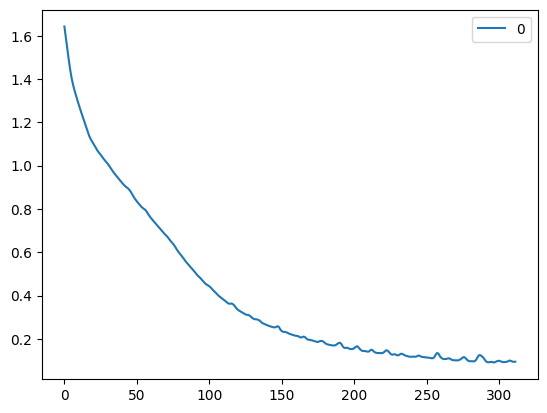

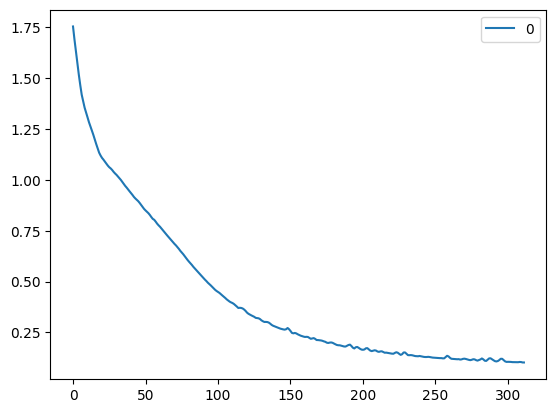

In [ ]:
import pandas as pd

pd.DataFrame(history.history['val_loss']).plot()
pd.DataFrame(history.history['loss']).plot()

In [ ]:
from tensorflow.keras import layers, regularizers
model = Sequential([
    Dense(20, input_shape=(4,), activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dense(10, activation='relu', kernel_regularizer=regularizers.l2(0.01),),
    Dense(3, activation='softmax')
])

from tensorflow.keras.callbacks import EarlyStopping

early = EarlyStopping(patience=10, restore_best_weights=True)

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'],
              )

history = model.fit(X_train, y_train, epochs=5000, batch_size=64,
                    validation_data=(X_test, y_test),
                    callbacks=[early])

Epoch 1/5000
2/2 [==============================] - 2s 346ms/step - loss: 1.6039 - accuracy: 0.3067 - val_loss: 1.5237 - val_accuracy: 0.3600
Epoch 2/5000
2/2 [==============================] - 0s 66ms/step - loss: 1.5747 - accuracy: 0.3067 - val_loss: 1.5032 - val_accuracy: 0.3600
Epoch 3/5000
2/2 [==============================] - 0s 75ms/step - loss: 1.5502 - accuracy: 0.3067 - val_loss: 1.4857 - val_accuracy: 0.3600
Epoch 4/5000
2/2 [==============================] - 0s 70ms/step - loss: 1.5279 - accuracy: 0.3067 - val_loss: 1.4712 - val_accuracy: 0.3600
Epoch 5/5000
2/2 [==============================] - 0s 54ms/step - loss: 1.5103 - accuracy: 0.3067 - val_loss: 1.4594 - val_accuracy: 0.3600
Epoch 6/5000
2/2 [==============================] - 0s 71ms/step - loss: 1.4935 - accuracy: 0.3067 - val_loss: 1.4502 - val_accuracy: 0.3600
Epoch 7/5000
2/2 [==============================] - 0s 40ms/step - loss: 1.4820 - accuracy: 0.3067 - val_loss: 1.4423 - val_accuracy: 0.3600
Epoch 8/5000

<Axes: >

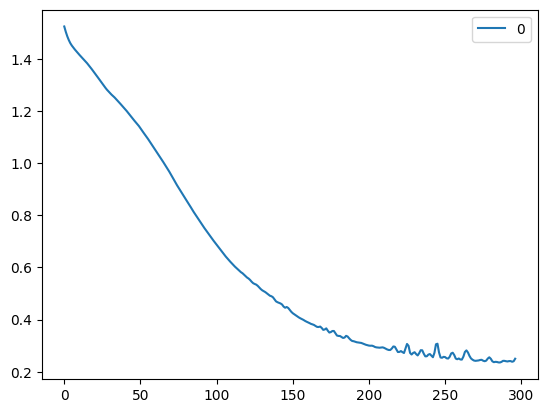

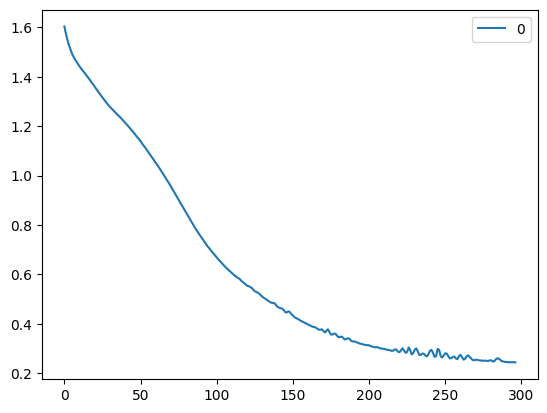

In [ ]:
import pandas as pd

pd.DataFrame(history.history['val_loss']).plot()
pd.DataFrame(history.history['loss']).plot()

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers

class CustomRegularizer(tf.keras.regularizers.Regularizer):
    def __init__(self, lambda_param):
        self.lambda_param = lambda_param

    def __call__(self, x):
        # Assuming x is a tensor of activations
        # Implement your custom regularization logic using activations
        # For example, you might calculate the sum of squares of differences between activations
        # and penalize it with lambda_param
        return tf.reduce_sum(tf.square(x)) * self.lambda_param

# Define your model architecture with custom regularization
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,),
                 kernel_regularizer=CustomRegularizer(lambda_param=0.01)),
    layers.Dense(32, activation='relu',
                 kernel_regularizer=CustomRegularizer(lambda_param=0.01)),
    layers.Dense(num_classes, activation='softmax')
])
